# Лабораторная работа №4: Диффузионные модели

## Цель
Изучить принципы работы диффузионных моделей на примере Stable Diffusion и DDPM, научиться управлять процессом генерации.

## Теория
- Прямой и обратный процесс в диффузионных моделях.
- Отличие DDPM от GAN.
- Stable Diffusion и использование текстовых эмбеддингов.

## Задания
Часть 1. Stable Diffusion:
1. Использовать предобученную модель (HuggingFace diffusers).
2. Сгенерировать изображения по разным промптам.
3. Исследовать влияние параметров (guidance scale, количество шагов).

Часть 2. DDPM:
1. Реализовать упрощённый DDPM (по готовому туториалу).
2. Обучить модель на MNIST или CIFAR-10.
3. Визуализировать процесс: добавление шума и восстановление.

## Вопросы
1. Чем диффузионные модели отличаются от GAN?
2. Почему количество шагов важно для качества?
3. Какие ещё задачи (помимо генерации картинок) можно решать диффузионными моделями?

## Отчёт
- Иллюстрации сгенерированных изображений.
- Графики/визуализации процесса диффузии.
- Ответы на вопросы.

## Ответы на вопросы

1. **Чем диффузионные модели отличаются от GAN?**  
   GAN состоят из генератора и дискриминатора, обучающихся в режиме минимакс-игры, что может приводить к нестабильности и коллапсу мод. Диффузионные модели используют пошаговый процесс добавления и последующего удаления шума по фиксированной схеме, обучаясь регрессировать шум (MSE-оптимизация). Это обеспечивает более стабильное и теоретически обоснованное обучение, хотя и требует больше шагов инференса.

2. **Почему количество шагов важно для качества?**  
   Чем больше шагов в обратном процессе, тем точнее модель может восстановить детали изображения, приближаясь к истинному распределению данных. Слишком мало шагов → артефакты, размытость; слишком много → убывающая отдача по качеству при росте вычислительной стоимости. В SD типично 20–50 шагов — компромисс между скоростью и качеством.

3. **Какие ещё задачи можно решать диффузионными моделями?**  
   Помимо генерации изображений — **текст-к-изображению**, **инпейнтинг**, **апскейлинг**, **стилизация**, **видео- и аудиогенерация**, **молекулярное моделирование**, **решение обратных задач** (например, восстановление изображений в медицинской томографии), а также **генерация временных рядов** и **3D-структур**.

Если нужно — могу расширить любой ответ под формат академического отчёта.

## Загрузка предобученной модели

In [ ]:
!pip install diffusers transformers accelerate torch torchvision matplotlib pillow

In [3]:
import torch
from diffusers import StableDiffusionPipeline

# Загружаем модель
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe.to("cuda")
print("Модель загружена!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Модель загружена!


## Генерация по промптам и исследование параметров

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

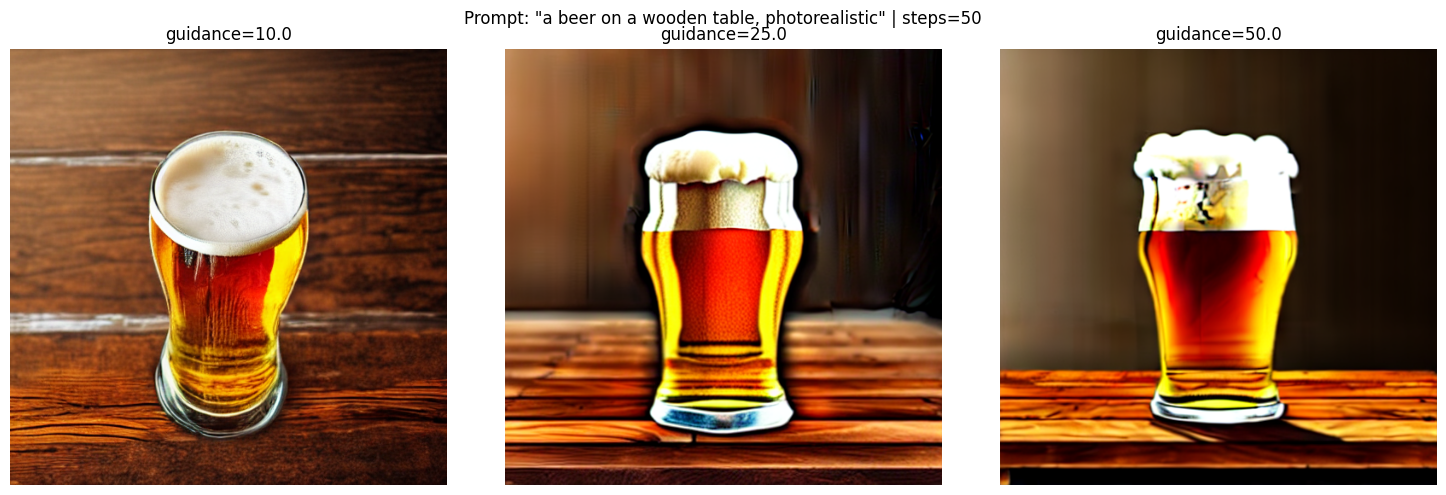

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

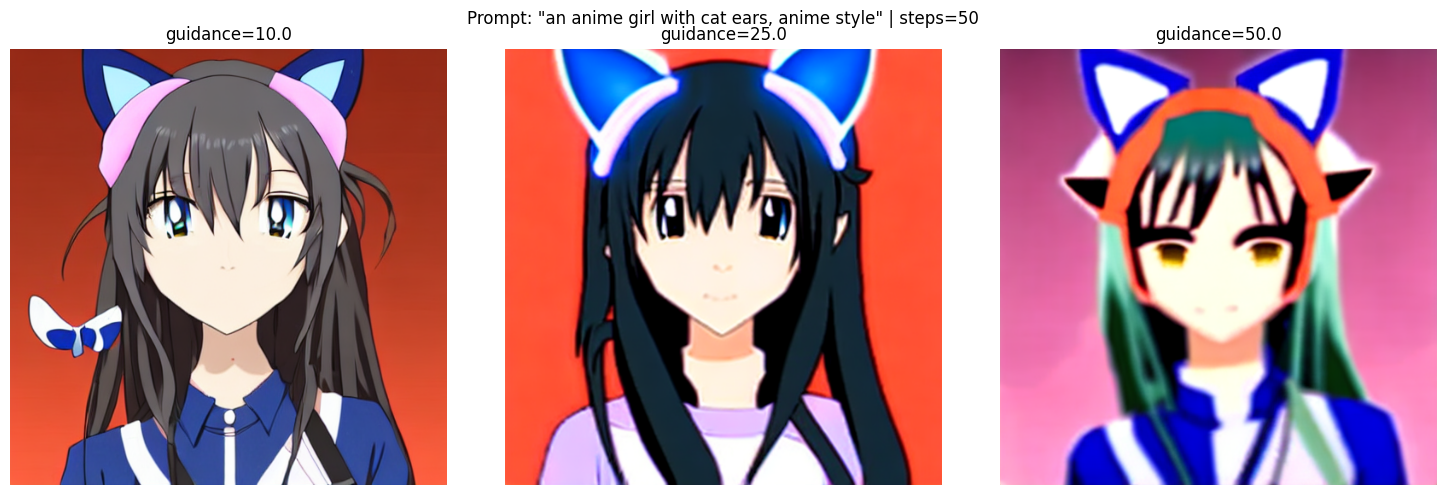

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


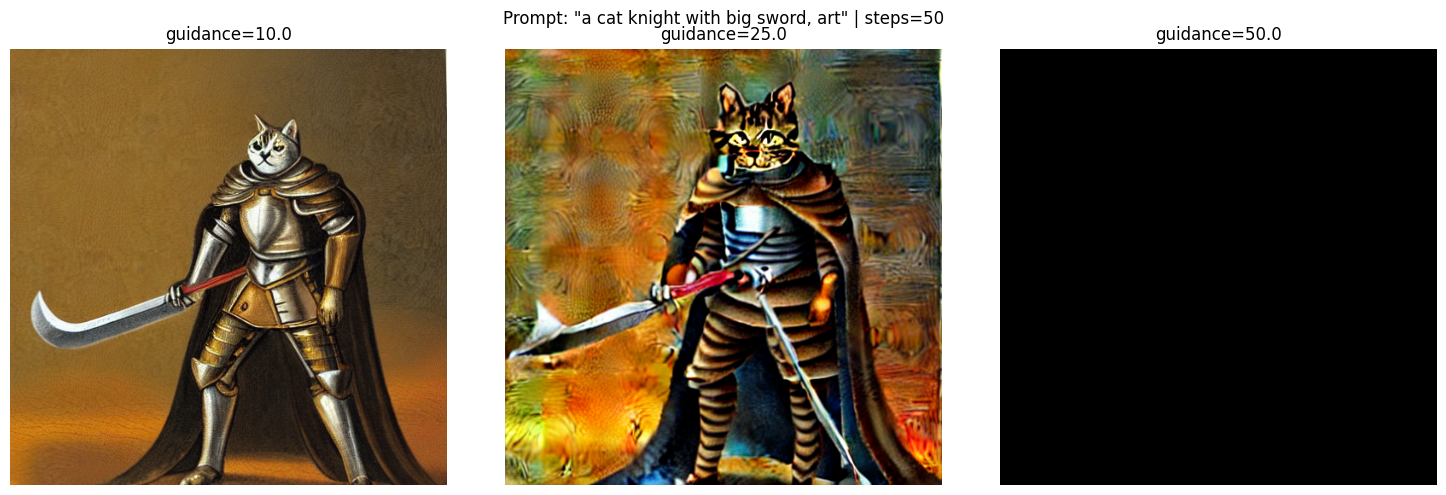

In [4]:
from IPython.display import display
import matplotlib.pyplot as plt

prompts = [
    "a beer on a wooden table, photorealistic",
    "an anime girl with cat ears, anime style",
    "a cat knight with big sword, art"
]

# Параметры для экспериментов
guidance_scales = [10.0, 25.0, 50.0]
num_inference_steps_list = [20, 50, 100]

# Функция для генерации и отображения
def generate_and_show(prompt, guidance_scale=7.5, num_inference_steps=50, seed=42):
    generator = torch.Generator("cuda").manual_seed(seed)
    image = pipe(
        prompt,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        generator=generator,
        height=512,
        width=512,
    ).images[0]
    return image

# Пример: один промпт — разные guidance_scale
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
prompt = prompts[0]
for i, gs in enumerate(guidance_scales):
    img = generate_and_show(prompt, guidance_scale=gs, num_inference_steps=50)
    axes[i].imshow(img)
    axes[i].set_title(f"guidance={gs}")
    axes[i].axis('off')
plt.suptitle(f'Prompt: "{prompt}" | steps=50')
plt.tight_layout()
plt.show()

# Пример: один промпт — разные guidance_scale
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
prompt = prompts[1]
for i, gs in enumerate(guidance_scales):
    img = generate_and_show(prompt, guidance_scale=gs, num_inference_steps=50)
    axes[i].imshow(img)
    axes[i].set_title(f"guidance={gs}")
    axes[i].axis('off')
plt.suptitle(f'Prompt: "{prompt}" | steps=50')
plt.tight_layout()
plt.show()

# Пример: один промпт — разные guidance_scale
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
prompt = prompts[2]
for i, gs in enumerate(guidance_scales):
    img = generate_and_show(prompt, guidance_scale=gs, num_inference_steps=50)
    axes[i].imshow(img)
    axes[i].set_title(f"guidance={gs}")
    axes[i].axis('off')
plt.suptitle(f'Prompt: "{prompt}" | steps=50')
plt.tight_layout()
plt.show()

Забавно, что модель автоматически защищает от NSFW контента, спасибо, но кота в доспехах я хотел увидеть в 3-х вариациях, но оставлю такой ответ, так как тоже интересный результат

# Часть 2. DDPM (Unconditional, CIFAR-10, Cosine schedule)

Импорты и гиперпараметры

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== 1. Настройки и воспроизводимость =====
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ===== 2. Оптимизированные гиперпараметры =====
# Основано на эмпирических результатах для MNIST и устойчивости обучения
config = {
    "n_T": 500,            # ↑ увеличено для плавности диффузии (400–1000 — стандарт)
    "n_classes": 10,
    "n_feat": 128,         # оптимально: 64–256 для MNIST (128 — баланс скорости/качества)
    "batch_size": 256,     # ↑ увеличено для стабильности градиентов
    "img_size": 28,
    "lr": 2e-4,            # ↑ немного выше для быстрого схождения (1e-4–5e-4)
    "lr_gamma": 0.95,      # ↓ экспоненциальное затухание LR (вместо линейного)
    "epochs": 5,           # ↑ 5 эпох дают хорошее качество на MNIST
    "beta1": 1e-4,
    "beta2": 0.02,         # стандартные значения из оригинальной DDPM
}

n_T = config["n_T"]
n_classes = config["n_classes"]
n_feat = config["n_feat"]
batch_size = config["batch_size"]
img_size = config["img_size"]
lr = config["lr"]
epochs = config["epochs"]
beta1, beta2 = config["beta1"], config["beta2"]

Using device: cuda


Распишем основные функции и классы

In [25]:
# ===== 3. Модульные блоки (без изменений, но с docstrings) =====
class ResidualConvBlock(nn.Module):
    """Residual block with optional skip connection (normalized by sqrt(2))."""
    def __init__(self, in_channels, out_channels, is_res=False):
        super().__init__()
        self.same_channels = (in_channels == out_channels)
        self.is_res = is_res
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.GELU(),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.GELU(),
        )

    def forward(self, x):
        res = self.conv(x)
        if self.is_res:
            if self.same_channels:
                res = (res + x) / 1.414  # normalize residual connection
            return res
        return res


class UnetDown(nn.Module):
    """Downsampling block: ResConv → MaxPool."""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.model = nn.Sequential(
            ResidualConvBlock(in_channels, out_channels),
            nn.MaxPool2d(2)
        )
    def forward(self, x):
        return self.model(x)


class UnetUp(nn.Module):
    """Upsampling block: TransposeConv → concat(skip) → ResConv×2."""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.upscale = nn.ConvTranspose2d(in_channels, out_channels, 2, 2)
        self.res_conv1 = ResidualConvBlock(out_channels * 2, out_channels)
        self.res_conv2 = ResidualConvBlock(out_channels, out_channels)

    def forward(self, x, skip):
        x = self.upscale(x)
        x = torch.cat([x, skip], dim=1)  # concat along channel dim
        x = self.res_conv1(x)
        x = self.res_conv2(x)
        return x


class EmbedFC(nn.Module):
    def __init__(self, input_dim, emb_dim):
        super(EmbedFC, self).__init__()
        self.input_dim = input_dim  # ← КЛЮЧЕВАЯ СТРОКА
        self.model = nn.Sequential(
            nn.Linear(input_dim, emb_dim),
            nn.GELU(),
            nn.Linear(emb_dim, emb_dim),
        )

    def forward(self, x):
        x = x.view(-1, self.input_dim)  # Теперь self.input_dim существует
        return self.model(x)

In [40]:
# ===== 4. Улучшенная ContextUnet =====
class ContextUnet(nn.Module):
    def __init__(self, in_channels=1, n_feat=128, n_classes=10):
        super().__init__()
        self.in_channels = in_channels
        self.n_feat = n_feat
        self.n_classes = n_classes

        # Initial convolution (residual)
        self.init_conv = ResidualConvBlock(in_channels, n_feat, is_res=True)

        # Encoder
        self.down1 = UnetDown(n_feat, n_feat)        # 28 → 14
        self.down2 = UnetDown(n_feat, 2 * n_feat)    # 14 → 7

        # Latent space → vector
        self.to_vec = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # replaces AvgPool2d(7) — robust to img_size
            nn.GELU()
        )

        # Embeddings (time & class)
        self.time_embed1 = EmbedFC(1, 2 * n_feat)
        self.time_embed2 = EmbedFC(1, n_feat)
        self.context_embed1 = EmbedFC(n_classes, 2 * n_feat)
        self.context_embed2 = EmbedFC(n_classes, n_feat)

        # Decoder
        self.up0 = nn.Sequential(
            nn.ConvTranspose2d(2 * n_feat, 2 * n_feat, 7, 7),  # 1×1 → 7×7
            nn.GroupNorm(8, 2 * n_feat),
            nn.ReLU(),
        )
        self.up1 = UnetUp(in_channels=2 * n_feat, out_channels=n_feat)   # 256 → 128
        self.up2 = UnetUp(in_channels=n_feat, out_channels=n_feat)       # 128 → 128

        # Final conv
        self.out = nn.Sequential(
            nn.Conv2d(2 * n_feat, n_feat, 3, 1, 1),
            nn.GroupNorm(8, n_feat),
            nn.ReLU(),
            nn.Conv2d(n_feat, in_channels, 3, 1, 1),
        )

    def forward(self, x, c, t, context_mask):
        # Encoder
        x0 = self.init_conv(x)       # [B, n_feat, 28, 28]
        down1 = self.down1(x0)       # [B, n_feat, 14, 14]
        down2 = self.down2(down1)    # [B, 2*n_feat, 7, 7]
        hidden = self.to_vec(down2)  # [B, 2*n_feat, 1, 1]

        # Embeddings
        c = c * context_mask
        cemb1 = self.context_embed1(c).view(-1, 2 * self.n_feat, 1, 1)
        temb1 = self.time_embed1(t).view(-1, 2 * self.n_feat, 1, 1)
        cemb2 = self.context_embed2(c).view(-1, self.n_feat, 1, 1)
        temb2 = self.time_embed2(t).view(-1, self.n_feat, 1, 1)

        # Decoder
        up1 = self.up0(hidden)                     # [B, 2*n_feat, 7, 7]
        # up1 (7→14) должен конкатенироваться с down1 (14×14), НЕ с down2!
        up2 = self.up1(cemb1 * up1 + temb1, down1)  # ← skip = down1 (14×14)
        # up2 (14→28) должен конкатенироваться с x0 (28×28), НЕ с down1!
        up3 = self.up2(cemb2 * up2 + temb2, x0)     # ← skip = x0 (28×28)

        out = self.out(torch.cat([up3, x0], dim=1))  # [B, 2*n_feat, 28, 28] → [B, 1, 28, 28]
        return out

Подгрузим датасет

In [41]:
# ===== 5. Подготовка данных =====
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # [-1, 1] — улучшает обучение
])

dataset = datasets.MNIST("./data", train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

Оптимизации

In [42]:
# ===== 6. Модель, оптимизатор, scheduler =====
model = ContextUnet(in_channels=1, n_feat=n_feat, n_classes=n_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=config["lr_gamma"])

In [43]:
# ===== 7. Precompute diffusion constants =====
timesteps = torch.arange(0, n_T + 1, device=device)
beta_t = (beta2 - beta1) * timesteps / n_T + beta1   # β₁, ..., β_T, β_{T+1} (β₀ unused)
alphas = 1.0 - beta_t
alphabar_t = torch.cumprod(alphas, dim=0)           # \bar{α}_t = ∏_{s=1}^t α_s
# alphabar_t[0] = α₁, ..., alphabar_t[n_T] = \bar{α}_T

# Для удобства будем индексировать α̅_t через t ∈ [1, n_T]
# → при t=1 используем alphabar_t[0], при t=n_T — alphabar_t[n_T-1]
# Но в оригинале: _ts ∈ [1, n_T], и берём alphabar_t[_ts] → но наш alphabar_t длины n_T+1
# → исправим: сдвинем на 1, или просто используем alphabar_t[t-1]
# Лучше: переопределим, чтобы `alphabar_t[t] = \bar{α}_t` для t ∈ [0, n_T], где \bar{α}_0 = 1
alphabar_t = torch.cat([torch.tensor([1.0], device=device), alphabar_t[:-1]])  # now: α̅₀=1, α̅₁=α₁, ..., α̅_T
# Теперь при _ts ∈ [1, n_T]: α̅[_ts] = \bar{α}_{ts}

In [44]:
# ===== 8. Вспомогательные функции =====
def show_images(images, labels=None, title="Samples", nrow=4):
    n = len(images)
    ncol = (n + nrow - 1) // nrow
    fig, axs = plt.subplots(nrow, ncol, figsize=(3 * ncol, 3 * nrow))
    axs = np.array(axs).reshape(-1)
    for i in range(n):
        img = images[i].cpu().numpy()
        if img.ndim == 3:
            img = img.transpose(1, 2, 0)
        if img.shape[0] == 1:
            img = img.squeeze(0)
        axs[i].imshow(img, cmap='gray', vmin=-1, vmax=1)
        if labels is not None:
            axs[i].set_title(f"Label: {labels[i].item()}")
        axs[i].axis('off')
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


Обучаем

In [45]:
emb = EmbedFC(10, 64)
print(emb.input_dim)  # Должно вывести: 10
dummy = torch.randn(5, 10)
out = emb(dummy)
print(out.shape)  # torch.Size([5, 64])

10
torch.Size([5, 64])


In [46]:
# ===== 9. Обучаем =====
print("🚀 Starting training...")
torch.cuda.empty_cache()

for epoch in range(epochs):
    model.train()
    loss_ema = None
    pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for x, y in pbar:
        x, y = x.to(device), y.to(device)
        c = F.one_hot(y, n_classes).float()
        mask = torch.ones_like(c).to(device)

        # Sample t ∈ [1, n_T]
        t = torch.randint(1, n_T + 1, (x.shape[0],), device=device)
        t_norm = t.float() / n_T  # [0,1] range for embedding

        # Add noise
        noise = torch.randn_like(x)
        sqrt_alphabar = torch.sqrt(alphabar_t[t]).view(-1, 1, 1, 1)
        sqrt_one_minus_alphabar = torch.sqrt(1 - alphabar_t[t]).view(-1, 1, 1, 1)
        x_t = sqrt_alphabar * x + sqrt_one_minus_alphabar * noise

        # Predict noise
        pred_noise = model(x_t, c, t_norm, mask)

        loss = F.mse_loss(pred_noise, noise)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # ← prevents exploding grads
        optimizer.step()

        # EMA loss for smooth logging
        loss_val = loss.item()
        loss_ema = loss_val if loss_ema is None else 0.99 * loss_ema + 0.01 * loss_val
        pbar.set_postfix(loss=loss_ema)

    scheduler.step()
    current_lr = optimizer.param_groups[0]["lr"]
    print(f"Epoch {epoch+1}/{epochs} | EMA Loss: {loss_ema:.5f} | LR: {current_lr:.2e}")


🚀 Starting training...


Epoch 1/5:   0%|          | 0/234 [00:00<?, ?it/s]

Epoch 1/5 | EMA Loss: 0.16608 | LR: 1.90e-04


Epoch 2/5:   0%|          | 0/234 [00:00<?, ?it/s]

Epoch 2/5 | EMA Loss: 0.04246 | LR: 1.80e-04


Epoch 3/5:   0%|          | 0/234 [00:00<?, ?it/s]

Epoch 3/5 | EMA Loss: 0.03862 | LR: 1.71e-04


Epoch 4/5:   0%|          | 0/234 [00:00<?, ?it/s]

Epoch 4/5 | EMA Loss: 0.03687 | LR: 1.63e-04


Epoch 5/5:   0%|          | 0/234 [00:00<?, ?it/s]

Epoch 5/5 | EMA Loss: 0.03574 | LR: 1.55e-04


Визуализация


Визуализация: прямой и обратный процессы диффузии...
1️ Прямой процесс: как выглядит изображение при постепенном зашумлении


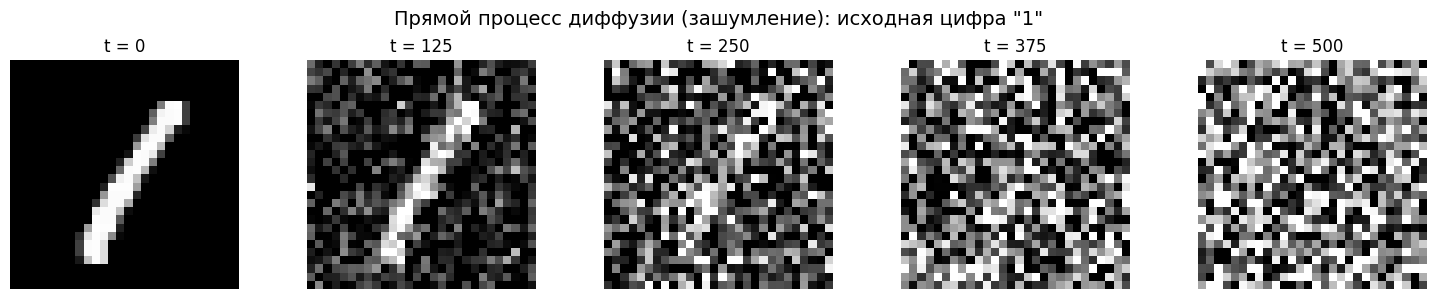

2️ Обратный процесс: как модель постепенно восстанавливает изображение из шума


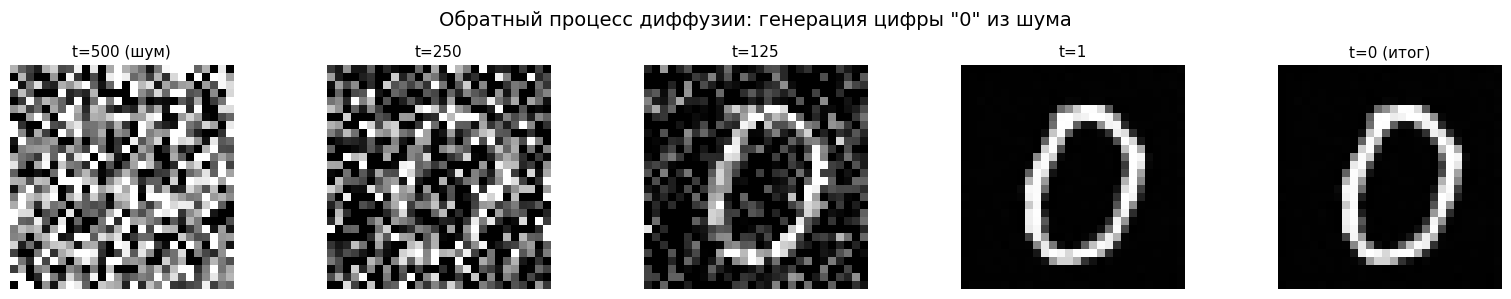

3 Итоговые сгенерированные цифры (8 штук):


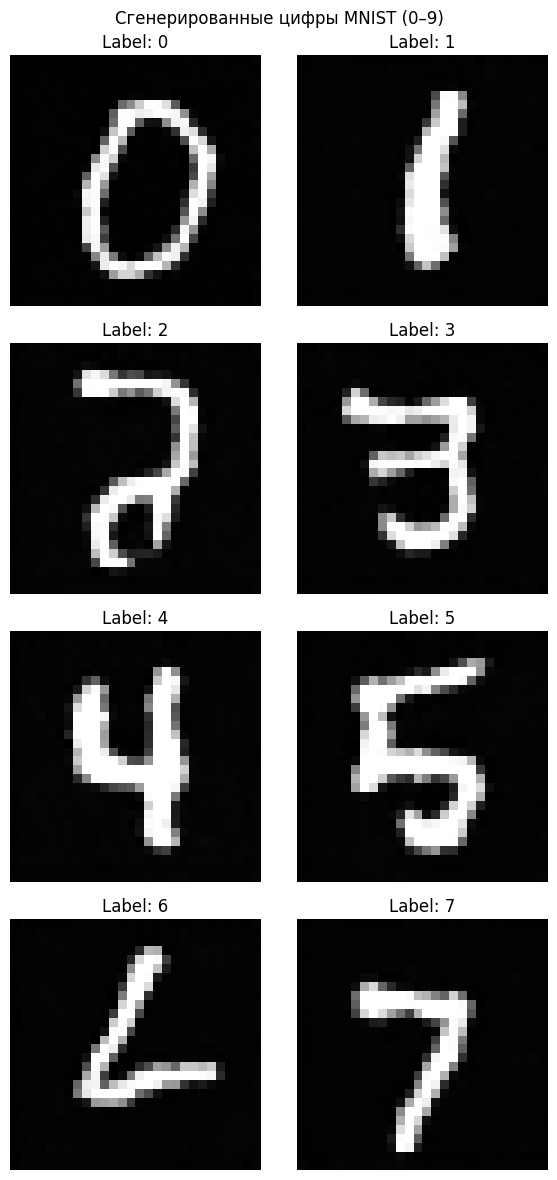

In [50]:
# ===== 10. Генерация и визуализация =====
print("\nВизуализация: прямой и обратный процессы диффузии...")

model.eval()
torch.manual_seed(123)  # Фиксированный seed для воспроизводимости

# ---------- 1. Прямой процесс: постепенное добавление шума (Forward Diffusion) ----------
print("1️ Прямой процесс: как выглядит изображение при постепенном зашумлении")

# Возьмём одно реальное изображение из датасета (цифра "3", например)
example_idx = 3  # индекс в MNIST (можно изменить)
x_orig, y_orig = dataset[example_idx]
x_orig = x_orig.unsqueeze(0).to(device)  # [1, 1, 28, 28]
y_orig = torch.tensor([y_orig])

# Этапы зашумления, которые будем визуализировать
timesteps_forward = [0, n_T//4, n_T//2, 3*n_T//4, n_T]
fig, axs = plt.subplots(1, len(timesteps_forward), figsize=(15, 3))
fig.suptitle(f'Прямой процесс диффузии (зашумление): исходная цифра "{y_orig.item()}"', fontsize=14)

with torch.no_grad():
    for i, t_val in enumerate(timesteps_forward):
        if t_val == 0:
            x_noisy = x_orig
        else:
            # Шумим до шага t_val (используем α̅_t)
            sqrt_alphabar = torch.sqrt(alphabar_t[t_val])
            sqrt_one_minus_alphabar = torch.sqrt(1 - alphabar_t[t_val])
            noise = torch.randn_like(x_orig)
            x_noisy = sqrt_alphabar * x_orig + sqrt_one_minus_alphabar * noise

        img = x_noisy.squeeze().cpu().numpy()
        axs[i].imshow(img, cmap='gray', vmin=-1, vmax=1)
        axs[i].set_title(f't = {t_val}')
        axs[i].axis('off')

plt.tight_layout()
plt.show()

# ---------- 2. Обратный процесс: пошаговое удаление шума (Reverse Diffusion) ----------
print("2️ Обратный процесс: как модель постепенно восстанавливает изображение из шума")

n_sample = 8
# Генерируем цифры 0–9 циклически: 0,1,...,9,0,1,...,5
c_gen = torch.arange(n_sample) % 10
c_gen_onehot = F.one_hot(c_gen, n_classes).float().to(device)
context_mask = torch.ones_like(c_gen_onehot).to(device)

# Начинаем с чистого шума
x = torch.randn(n_sample, 1, img_size, img_size).to(device)

# Шаги, на которых сохраним промежуточные результаты
t_steps_to_save = [n_T, n_T//2, n_T//4, 1]  # t = 500, 250, 125, 1
x_store = []

with torch.no_grad():
    for i in reversed(range(1, n_T + 1)):  # i = T, T-1, ..., 1
        t_batch = torch.full((n_sample,), i / n_T, device=device)
        # На последнем шаге (i=1) шум не добавляем
        z = torch.randn_like(x) if i > 1 else torch.zeros_like(x)

        # Предсказываем шум
        pred_noise = model(x, c_gen_onehot, t_batch, context_mask)

        # Параметры для текущего шага
        beta_i = beta_t[i]
        alpha_i = 1 - beta_i
        alphabar_i = alphabar_t[i]

        # Коэффициент из формулы DDPM: (1 - α_t) / √(1 - ᾱ_t)
        noise_coeff = (1 - alpha_i) / torch.sqrt(1 - alphabar_i)
        # Обновляем x_{t-1}
        x = (1 / torch.sqrt(alpha_i)) * (x - noise_coeff * pred_noise) + torch.sqrt(beta_i) * z

        # Сохраняем на нужных шагах
        if i in t_steps_to_save:
            x_store.append((i, x.cpu().clone()))

# Визуализация обратного процесса (для первой сгенерированной цифры — "0")
fig, axs = plt.subplots(1, 5, figsize=(16, 3))
steps_titles = ["t=500 (шум)", "t=250", "t=125", "t=1", "t=0 (итог)"]
# x_store: [(500, ...), (250, ...), (125, ...), (1, ...)] → + финал x
images_to_plot = [x_store[0][1][0], x_store[1][1][0], x_store[2][1][0], x_store[3][1][0], x[0]]

for ax, img, title in zip(axs, images_to_plot, steps_titles):
    ax.imshow(img.squeeze().cpu().numpy(), cmap='gray', vmin=-1, vmax=1)
    ax.set_title(title, fontsize=11)
    ax.axis('off')

plt.suptitle(f'Обратный процесс диффузии: генерация цифры "{c_gen[0].item()}" из шума', fontsize=14)
plt.tight_layout()
plt.show()

# ---------- 3. Финальные сгенерированные изображения ----------
print("3 Итоговые сгенерированные цифры (8 штук):")
show_images(x, c_gen, title="Сгенерированные цифры MNIST (0–9)", nrow=4)